# Calculate Landuse Availabilities

This example shows how `atlite` can deal with landuse restrictions. The script is adjusted from the excellent `atlite` examples that can be found here https://github.com/PyPSA/atlite/tree/master/examples

In [163]:
import atlite
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show
from atlite.gis import shape_availability, ExclusionContainer

import os
import sys
sys.path.append('../')  # to import helpers
from scripts._helpers import _sets_path_to_root
_sets_path_to_root("pypsa-africa")


# IMPORTANT: RUN SCRIPT FROM THIS SCRIPTS DIRECTORY i.e data_exploration/ TODO: make more robust
# os.chdir(os.path.dirname(os.path.abspath(__file__)))
# sys.path.append("./../scripts")

plt.rcParams['figure.figsize'] = [7, 7]

This is the repository path:  /home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/pypsa-africa
Had to go 0 folder(s) up.


With `geopandas` we retrieve the geographic shapes (in vector format) for Nigeria and Niger.

[ 2.69170169  4.24059418 14.57717777 13.86592398]


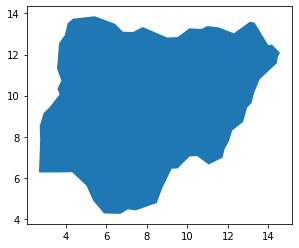

In [208]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
africa = world.query('continent == "Africa"')
countries = ["Nigeria"] # "Niger"]
shapes = world[world.name.isin(countries)].set_index('name')


import math

# For showing cutouts in Africa
# shapes = africa
shapes.plot();
print(shapes.total_bounds)
latmin, lonmin, latmax, lonmax = shapes.total_bounds

#latmin, lonmin, latmax, lonmax = math.floor(latmin), math.ceil(lonmin), math.floor(latmax), math.ceil(lonmax)

We create an `atlite.Cutout` which covers the whole regions and builds the backbone for our analysis. Later, it will enable to retrieve the needed weather data. 

In [258]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

In [259]:
res_t_path = os.path.realpath("resources")+"/profile_solar.nc"
res_t = xr.open_dataset(res_t_path)

In [260]:
res_t #.values

<xarray.Dataset>
Dimensions:           (time: 8760, bus: 735, y: 257, x: 291)
Coordinates:
  * time              (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
  * bus               (bus) object '4358' '4359' '4360' ... '15128' '15130'
  * y                 (y) float64 -37.5 -37.2 -36.9 -36.6 ... 38.7 39.0 39.3
  * x                 (x) float64 -19.5 -19.2 -18.9 -18.6 ... 66.9 67.2 67.5
Data variables:
    profile           (time, bus) float64 ...
    weight            (bus) float64 ...
    p_nom_max         (bus) float64 ...
    potential         (y, x) float64 ...
    average_distance  (bus) float64 ...

In [261]:
res_t = res_t.sel(x=np.arange(latmin,latmax,0.01), y=np.arange(lonmin,lonmax,0.01), method="nearest")

(0.0, 10.0)

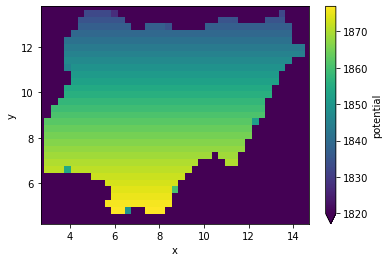

In [270]:
res_t.potential[:].plot(vmin=1820, vmax=res_t.potential[:].max())
ax.set_xlim(0,20)
ax.set_ylim(0,10)